# Food Delivery Cost Analysis Using python

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('food delivery costs.csv')
print(df.head())

   Order ID Customer ID Restaurant ID Order Date and Time  \
0         1       C8270         R2924    01-02-2024 01:11   
1         2       C1860         R2054    02-02-2024 22:11   
2         3       C6390         R2870    31-01-2024 05:54   
3         4       C6191         R2642    16-01-2024 22:52   
4         5       C6734         R2799    29-01-2024 01:19   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0       01-02-2024 02:39         1914             0       Credit Card   
1       02-02-2024 22:46          986            40    Digital Wallet   
2       31-01-2024 06:52          937            30  Cash on Delivery   
3       16-01-2024 23:38         1463            50  Cash on Delivery   
4       29-01-2024 02:48         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                      23

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


# Data Cleaning

In [4]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [5]:
df["Discounts and Offers"] = df["Discounts and Offers"].replace("None",float(0))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [6]:
def extract_percentage(value):
    a = str(value).split() #bydeault split function splits on basis of whitespaces
    return a[0]

df['Discounts and Offers'] = df['Discounts and Offers'].apply(extract_percentage)
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5%,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15%,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.0,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50,130,50,0


In [7]:
def remove_p(value):
    if "%" in value:
        a = value.replace("%","")
        return float(a)
    else:
        return float(value)

df['Discounts and Offers'] = df['Discounts and Offers'].apply(remove_p)
df.head()  

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5.0,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10.0,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15.0,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.0,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.0,130,50,0


In [8]:
print(df["Discounts and Offers"])

0       5.0
1      10.0
2      15.0
3       0.0
4      50.0
       ... 
995     5.0
996     0.0
997     0.0
998    15.0
999    15.0
Name: Discounts and Offers, Length: 1000, dtype: float64


In [9]:
df.loc[(df["Discounts and Offers"] <= 15)]
df["Discounts and Offers"].head()

0     5.0
1    10.0
2    15.0
3     0.0
4    50.0
Name: Discounts and Offers, dtype: float64

In [10]:
df.loc[(df["Discounts and Offers"] <= 15) ,"Discounts and Offers"] = (df["Discounts and Offers"]/100) * df["Order Value"]
#df.loc[(df["Discounts and Offers"] <= 15)]
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0


# Feature Engineering & Analyses with charts

In [11]:
df["Costs"] = df["Delivery Fee"] + df["Discounts and Offers"] + df["Payment Processing Fee"]
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00


In [12]:
df["Profit"] = df["Commission Fee"] - df["Costs"]
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00


In [13]:
df["Profit"].sum()

-5751.85

In [14]:
cost_dist =df[["Delivery Fee" ,"Discounts and Offers" ,"Payment Processing Fee"]].sum()
cost_dist

Delivery Fee              28620.00
Discounts and Offers      74289.85
Payment Processing Fee    29832.00
dtype: float64

In [15]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

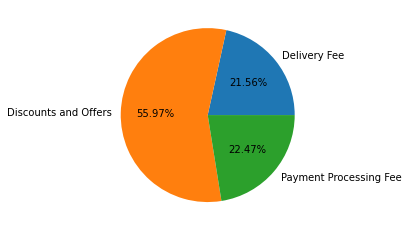

In [16]:
plt.pie(cost_dist, labels=cost_dist.index,autopct= "%1.2f%%")
plt.show

In [17]:
burner_dist=df[["Commission Fee" ,"Costs" ,"Profit"]].sum()
burner_dist

Commission Fee    126990.00
Costs             132741.85
Profit             -5751.85
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

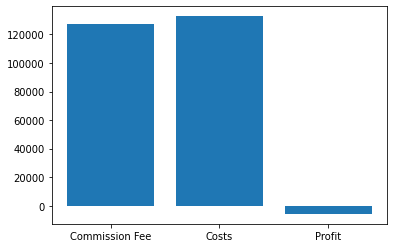

In [18]:
plt.bar(burner_dist.index, burner_dist)
plt.show

In [19]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00


In [20]:
df['Payment Method'].unique()

array(['Credit Card', 'Digital Wallet', 'Cash on Delivery'], dtype=object)

In [21]:
sum_payment_category = df.groupby('Payment Method')['Delivery Fee']
dist_sum_payment_category=sum_payment_category.sum()
dist_sum_payment_category

Payment Method
Cash on Delivery    10050
Credit Card          9810
Digital Wallet       8760
Name: Delivery Fee, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

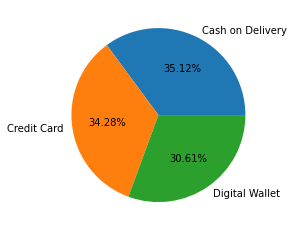

In [22]:
plt.pie(dist_sum_payment_category, labels=dist_sum_payment_category.index,autopct= "%1.2f%%")
plt.show

In [23]:
# df.loc[(df["Discounts and Offers"] <= 15) ,"Discounts and Offers"]
credit_card_filter = df.loc[(df['Payment Method'] == "Credit Card"),["Delivery Fee" ,"Discounts and Offers" ,"Payment Processing Fee"]]
credit_card_filter.head()

,Delivery Fee,Discounts and Offers,Payment Processing Fee
0,0,95.7,47
7,0,26.0,19
11,20,270.0,36
14,0,0.0,16
16,20,75.6,38


In [24]:
max_amt = credit_card_filter.max()
min_amt = credit_card_filter.min()
print(max_amt)
print(min_amt)

Delivery Fee               50.0
Discounts and Offers      297.6
Payment Processing Fee     50.0
dtype: float64
Delivery Fee               0.0
Discounts and Offers       0.0
Payment Processing Fee    10.0
dtype: float64


Converting delivery date to exact day of week 

In [25]:
df['Delivery_Day_name']=df['Delivery Date and Time'].dt.day_name()


In [26]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30,Tuesday
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40,Friday
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00,Monday


In [27]:
revenue_by_days = df.groupby('Delivery_Day_name')['Costs']
revenue_by_days.sum()

Delivery_Day_name
Friday       17956.35
Monday       18943.60
Saturday     21327.45
Sunday       20949.65
Thursday     15905.95
Tuesday      25437.30
Wednesday    12221.55
Name: Costs, dtype: float64

C:\Users\shubh\AppData\Local\Temp/ipykernel_15068/2330391520.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Delivery_Day_name'], y=df['Costs'], data=df, estimator=sum, ci=None)


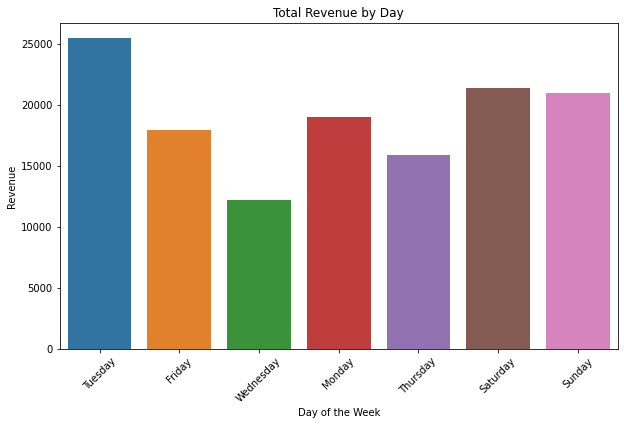

In [28]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Delivery_Day_name'], y=df['Costs'], data=df, estimator=sum, ci=None)
plt.title('Total Revenue by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

C:\Users\shubh\AppData\Local\Temp/ipykernel_15068/1754451522.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Delivery_Day_name'], y=df['Profit'], data=df, estimator=sum, ci=None)


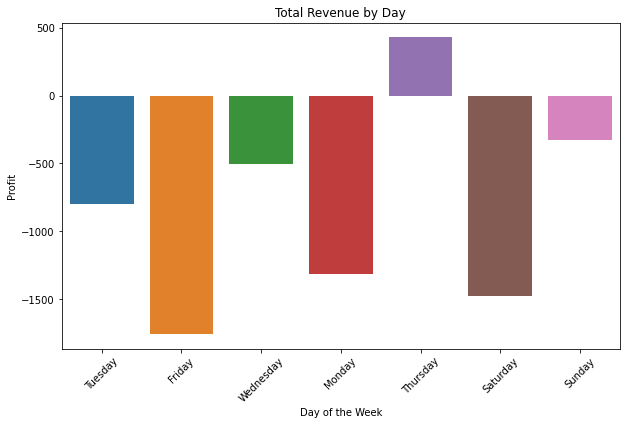

In [29]:
# Box plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Delivery_Day_name'], y=df['Profit'], data=df, estimator=sum, ci=None)
plt.title('Total Revenue by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

In [30]:
friday_stats =df.loc[(df['Delivery_Day_name']=="Friday"),["Delivery Fee" ,"Discounts and Offers" ,"Payment Processing Fee","Costs","Profit"]]
friday_stats.sum()

Delivery Fee               3560.00
Discounts and Offers      10437.35
Payment Processing Fee     3959.00
Costs                     17956.35
Profit                    -1756.35
dtype: float64

In [31]:
thursday_stats =df.loc[(df['Delivery_Day_name']=="Thursday"),["Delivery Fee" ,"Discounts and Offers" ,"Payment Processing Fee","Costs","Profit"]]
thursday_stats.sum()

Delivery Fee               3820.00
Discounts and Offers       8205.95
Payment Processing Fee     3880.00
Costs                     15905.95
Profit                      428.05
dtype: float64

On thursday discount and offers were less that's zamato made some profit on the thurday's of each month

In [32]:
Wednesday_stat =df.loc[(df['Delivery_Day_name']=="Wednesday"),["Delivery Fee" ,"Discounts and Offers" ,"Payment Processing Fee","Costs","Profit"]]
Wednesday_stat.sum()

Delivery Fee               2450.00
Discounts and Offers       7146.55
Payment Processing Fee     2625.00
Costs                     12221.55
Profit                     -502.55
dtype: float64

C:\Users\shubh\AppData\Local\Temp/ipykernel_15068/808550516.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Delivery_Day_name'], y=df['Discounts and Offers'], data=df, marker='o', estimator=sum, ci=None)


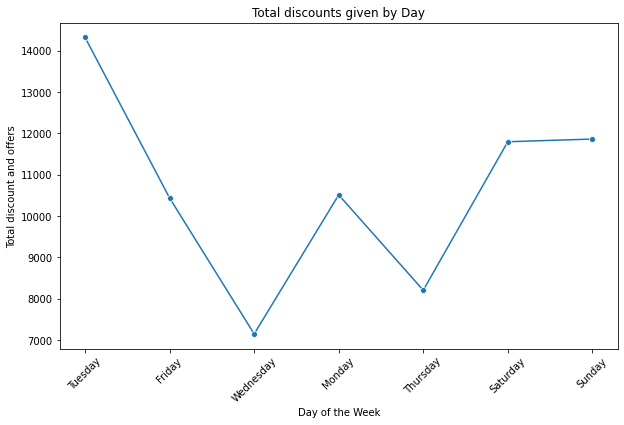

In [33]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Delivery_Day_name'], y=df['Discounts and Offers'], data=df, marker='o', estimator=sum, ci=None)
plt.title('Total discounts given by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total discount and offers')
plt.xticks(rotation=45)
plt.show()

In [34]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30,Tuesday
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40,Friday
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00,Monday


In [35]:
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Delivery_Time_AM_PM'] = df['Delivery Date and Time'].dt.strftime('%I %p')

In [36]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name,Delivery_Time_AM_PM
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30,Tuesday,02 AM
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40,Friday,10 PM
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55,Wednesday,06 AM
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00,Tuesday,11 PM
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00,Monday,02 AM


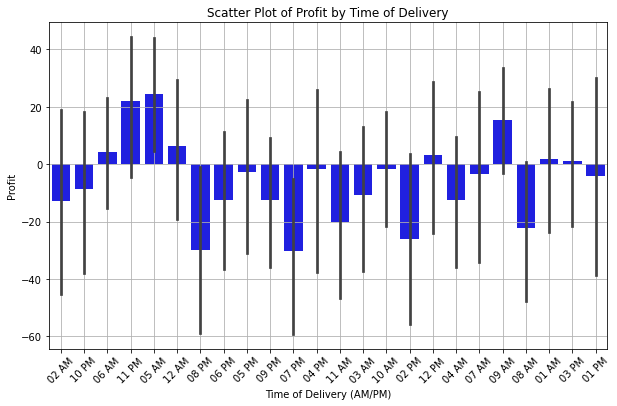

In [37]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Delivery_Time_AM_PM', y='Profit', data=df, color='blue')
plt.xlabel('Time of Delivery (AM/PM)')
plt.ylabel('Profit')
plt.title('Scatter Plot of Profit by Time of Delivery')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [38]:
def categorize_time_range(hour):
    if hour == 0:
        return '12-1 AM'
    elif hour < 12:
        return f'{hour}-{hour+1} AM'
    elif hour == 12:
        return '12-1 PM'
    else:
        return f'{hour-12}-{hour-11} PM'

df['Time_Range'] = df['Delivery Date and Time'].dt.hour.apply(categorize_time_range)

In [39]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name,Delivery_Time_AM_PM,Time_Range
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30,Tuesday,02 AM,2-3 AM
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40,Friday,10 PM,10-11 PM
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55,Wednesday,06 AM,6-7 AM
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00,Tuesday,11 PM,11-12 PM
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00,Monday,02 AM,2-3 AM


C:\Users\shubh\AppData\Local\Temp/ipykernel_15068/1362676127.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time_Range', y='Profit', data=df, ci=None)


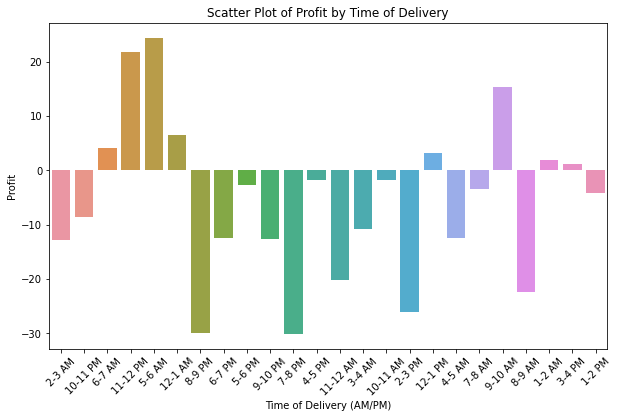

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_Range', y='Profit', data=df, ci=None)
plt.xlabel('Time of Delivery (AM/PM)')
plt.ylabel('Profit')
plt.title('Scatter Plot of Profit by Time of Delivery')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [41]:
def profitable_d(profit):
    if profit > 0:
        profit = 1 #profit
    else:
        profit = 0 #loss
    return profit

df['Profitable']=df['Profit'].apply(profitable_d)

In [42]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name,Delivery_Time_AM_PM,Time_Range,Profitable
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,95.70,150,47,0,142.70,7.30,Tuesday,02 AM,2-3 AM,1
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40,Friday,10 PM,10-11 PM,1
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55,Wednesday,06 AM,6-7 AM,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00,Tuesday,11 PM,11-12 PM,1
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00,Monday,02 AM,2-3 AM,0


In [43]:
# Delivery_Day_name is in categorial format (alphabetical format) lets convert it into numerical format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Delivery_Day_name'] = label_encoder.fit_transform(df['Delivery_Day_name'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name,Delivery_Time_AM_PM,Time_Range,Profitable
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,1,95.70,150,47,0,142.70,7.30,5,02 AM,2-3 AM,1
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,2,98.60,198,23,0,161.60,36.40,0,10 PM,10-11 PM,1
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,0,140.55,195,45,0,215.55,-20.55,6,06 AM,6-7 AM,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,0,0.00,146,27,0,77.00,69.00,5,11 PM,11-12 PM,1
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,0,50.00,130,50,0,130.00,0.00,1,02 AM,2-3 AM,0


# Machine learning part to forecast data to make it profitable

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [45]:
X = df[['Payment Method','Costs', 'Delivery_Day_name', 'Delivery_Time_AM_PM', 'Time_Range']]
y = df['Profitable']

In [46]:
X = pd.get_dummies(X, drop_first=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       138
           1       0.78      0.82      0.80       162

    accuracy                           0.78       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.78      0.78       300



In [65]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit,Delivery_Day_name,Delivery_Time_AM_PM,Time_Range,Profitable
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,1,95.70,150,47,0,142.70,7.30,5,02 AM,2-3 AM,1
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,2,98.60,198,23,0,161.60,36.40,0,10 PM,10-11 PM,1
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,0,140.55,195,45,0,215.55,-20.55,6,06 AM,6-7 AM,0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,0,0.00,146,27,0,77.00,69.00,5,11 PM,11-12 PM,1
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,0,50.00,130,50,0,130.00,0.00,1,02 AM,2-3 AM,0


In [66]:
profit_count = 0
loss_count = 0

# Iterate through the predictions
for i in range(50):  # Assuming you want to iterate over the first 50 predictions
    if y_pred[i] == 1:
        result = "Profitable"
        profit_count += 1
    else: 
        result = "Not Profitable"   
        loss_count += 1
    
    # Print the result for each prediction
    print(f"The delivery {i+1} is predicted to be: {result}")

print(f"\nSummary:")
print(f"Total Profitable Deliveries: {profit_count}")
print(f"Total Non-Profitable Deliveries: {loss_count}")

The delivery 1 is predicted to be: Not Profitable
The delivery 2 is predicted to be: Not Profitable
The delivery 3 is predicted to be: Profitable
The delivery 4 is predicted to be: Profitable
The delivery 5 is predicted to be: Profitable
The delivery 6 is predicted to be: Not Profitable
The delivery 7 is predicted to be: Not Profitable
The delivery 8 is predicted to be: Profitable
The delivery 9 is predicted to be: Profitable
The delivery 10 is predicted to be: Profitable
The delivery 11 is predicted to be: Profitable
The delivery 12 is predicted to be: Profitable
The delivery 13 is predicted to be: Not Profitable
The delivery 14 is predicted to be: Profitable
The delivery 15 is predicted to be: Profitable
The delivery 16 is predicted to be: Not Profitable
The delivery 17 is predicted to be: Not Profitable
The delivery 18 is predicted to be: Profitable
The delivery 19 is predicted to be: Not Profitable
The delivery 20 is predicted to be: Profitable
The delivery 21 is predicted to be: N